In [1]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(ReactomePA)
library(tidyverse)



Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.3  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are

In [2]:
setwd('/Users//matthewcoates/Documents/Cambridge/R files/COVID scRNAseq nasal biopsy + blood/DEGs/')

In [3]:
degs <- as.list(list.files('120721/ConvalCov/', full.names= TRUE, pattern ='.csv'))

In [4]:

names(degs) <- gsub('120721/ConvalCov/DEG_B_FO_ConCOVH.csv', '', list.files('120721/ConvalCov/',pattern ='.csv'))
names(degs) <- substr(names(degs), start = 1, stop = nchar(names(degs))-4)
names(degs)



[1] "DEG_B_FO_ConCOVH"              "DEG_B_Naive_ConCOVH"          
 [3] "DEG_B_nonswitched_ConCOVH"     "DEG_B_switched_ConCOVH"       
 [5] "DEG_Basophil_ConCOVH"          "DEG_CD4_Act_ConCOVH"          
 [7] "DEG_CD4_Tcm_ConCOVH"           "DEG_CD4_Tem_ConCOVH"          
 [9] "DEG_CD4_Th17_ConCOVH"          "DEG_CD4_Th2_ConCOVH"          
[11] "DEG_CD4_Tn_ConCOVH"            "DEG_CD4_Trm_ConCOVH"          
[13] "DEG_CD8_CTL_ConCOVH"           "DEG_CD8_Tn_ConCOVH"           
[15] "DEG_CD8_Trm_ConCOVH"           "DEG_cDC_CD141_ConCOVH"        
[17] "DEG_cDC_CD1c_ConCOVH"          "DEG_DC_Follicular_ConCOVH"    
[19] "DEG_Endo_Stromal_ConCOVH"      "DEG_Epi_Basal_ConCOVH"        
[21] "DEG_Epi_Ciliated_ConCOVH"      "DEG_Epi_Secretory_ConCOVH"    
[23] "DEG_Epi_Squamous_ConCOVH"      "DEG_gdT_vd1_ConCOVH"          
[25] "DEG_gdT_vd2_ConCOVH"           "DEG_gdT_vd3_ConCOVH"          
[27] "DEG_ILC_ConCOVH"               "DEG_MAIT_ConCOVH"             
[29] "DEG_Mast_ConCOVH"              "DEG_Mega_ConCOVH"             
[31] "DEG_MMP_nonres_ConCOVH"        "DEG_MMP_res_ConCOVH"          
[33] "DEG_Mono_classical_ConCOVH"    "DEG_Mono_nonclassical_ConCOVH"
[35] "DEG_NK_adaptive_ConCOVH"       "DEG_NK_CD16_ConCOVH"          
[37] "DEG_NK_CD56_ConCOVH"           "DEG_pDC_ConCOVH"              
[39] "DEG_Plasma_blastIgM_ConCOVH"   "DEG_Plasma_ConCOVH"           
[41] "DEG_Tfh_ConCOVH"               "DEG_Treg_ConCOVH"

In [5]:
degs

$DEG_B_FO_ConCOVH
[1] "120721/ConvalCov//DEG_B_FO_ConCOVH.csv"

$DEG_B_Naive_ConCOVH
[1] "120721/ConvalCov//DEG_B_Naive_ConCOVH.csv"

$DEG_B_nonswitched_ConCOVH
[1] "120721/ConvalCov//DEG_B_nonswitched_ConCOVH.csv"

$DEG_B_switched_ConCOVH
[1] "120721/ConvalCov//DEG_B_switched_ConCOVH.csv"

$DEG_Basophil_ConCOVH
[1] "120721/ConvalCov//DEG_Basophil_ConCOVH.csv"

$DEG_CD4_Act_ConCOVH
[1] "120721/ConvalCov//DEG_CD4_Act_ConCOVH.csv"

$DEG_CD4_Tcm_ConCOVH
[1] "120721/ConvalCov//DEG_CD4_Tcm_ConCOVH.csv"

$DEG_CD4_Tem_ConCOVH
[1] "120721/ConvalCov//DEG_CD4_Tem_ConCOVH.csv"

$DEG_CD4_Th17_ConCOVH
[1] "120721/ConvalCov//DEG_CD4_Th17_ConCOVH.csv"

$DEG_CD4_Th2_ConCOVH
[1] "120721/ConvalCov//DEG_CD4_Th2_ConCOVH.csv"

$DEG_CD4_Tn_ConCOVH
[1] "120721/ConvalCov//DEG_CD4_Tn_ConCOVH.csv"

$DEG_CD4_Trm_ConCOVH
[1] "120721/ConvalCov//DEG_CD4_Trm_ConCOVH.csv"

$DEG_CD8_CTL_ConCOVH
[1] "120721/ConvalCov//DEG_CD8_CTL_ConCOVH.csv"

$DEG_CD8_Tn_ConCOVH
[1] "120721/ConvalCov//DEG_CD8_Tn_ConCOVH.csv"

$DEG_CD8_Trm_ConCOVH
[1] "120721/ConvalCov//DEG_CD8_Trm_ConCOVH.csv"

$DEG_cDC_CD141_ConCOVH
[1] "120721/ConvalCov//DEG_cDC_CD141_ConCOVH.csv"

$DEG_cDC_CD1c_ConCOVH
[1] "120721/ConvalCov//DEG_cDC_CD1c_ConCOVH.csv"

$DEG_DC_Follicular_ConCOVH
[1] "120721/ConvalCov//DEG_DC_Follicular_ConCOVH.csv"

$DEG_Endo_Stromal_ConCOVH
[1] "120721/ConvalCov//DEG_Endo_Stromal_ConCOVH.csv"

$DEG_Epi_Basal_ConCOVH
[1] "120721/ConvalCov//DEG_Epi_Basal_ConCOVH.csv"

$DEG_Epi_Ciliated_ConCOVH
[1] "120721/ConvalCov//DEG_Epi_Ciliated_ConCOVH.csv"

$DEG_Epi_Secretory_ConCOVH
[1] "120721/ConvalCov//DEG_Epi_Secretory_ConCOVH.csv"

$DEG_Epi_Squamous_ConCOVH
[1] "120721/ConvalCov//DEG_Epi_Squamous_ConCOVH.csv"

$DEG_gdT_vd1_ConCOVH
[1] "120721/ConvalCov//DEG_gdT_vd1_ConCOVH.csv"

$DEG_gdT_vd2_ConCOVH
[1] "120721/ConvalCov//DEG_gdT_vd2_ConCOVH.csv"

$DEG_gdT_vd3_ConCOVH
[1] "120721/ConvalCov//DEG_gdT_vd3_ConCOVH.csv"

$DEG_ILC_ConCOVH
[1] "120721/ConvalCov//DEG_ILC_ConCOVH.csv"

$DEG_MAIT_ConCOVH
[1] "120721/ConvalCov//DEG_MAIT_ConCOVH.csv"

$DEG_Mast_ConCOVH
[1] "120721/ConvalCov//DEG_Mast_ConCOVH.csv"

$DEG_Mega_ConCOVH
[1] "120721/ConvalCov//DEG_Mega_ConCOVH.csv"

$DEG_MMP_nonres_ConCOVH
[1] "120721/ConvalCov//DEG_MMP_nonres_ConCOVH.csv"

$DEG_MMP_res_ConCOVH
[1] "120721/ConvalCov//DEG_MMP_res_ConCOVH.csv"

$DEG_Mono_classical_ConCOVH
[1] "120721/ConvalCov//DEG_Mono_classical_ConCOVH.csv"

$DEG_Mono_nonclassical_ConCOVH
[1] "120721/ConvalCov//DEG_Mono_nonclassical_ConCOVH.csv"

$DEG_NK_adaptive_ConCOVH
[1] "120721/ConvalCov//DEG_NK_adaptive_ConCOVH.csv"

$DEG_NK_CD16_ConCOVH
[1] "120721/ConvalCov//DEG_NK_CD16_ConCOVH.csv"

$DEG_NK_CD56_ConCOVH
[1] "120721/ConvalCov//DEG_NK_CD56_ConCOVH.csv"

$DEG_pDC_ConCOVH
[1] "120721/ConvalCov//DEG_pDC_ConCOVH.csv"

$DEG_Plasma_blastIgM_ConCOVH
[1] "120721/ConvalCov//DEG_Plasma_blastIgM_ConCOVH.csv"

$DEG_Plasma_ConCOVH
[1] "120721/ConvalCov//DEG_Plasma_ConCOVH.csv"

$DEG_Tfh_ConCOVH
[1] "120721/ConvalCov//DEG_Tfh_ConCOVH.csv"

$DEG_Treg_ConCOVH
[1] "120721/ConvalCov//DEG_Treg_ConCOVH.csv"

In [6]:
degs <- lapply(degs,function(i){
  read.table(i, header = T, sep = ",", row.names = NULL)
})
degs <- degs[order(names(degs))]
degs

X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HLA-DRB5,2.009053e-98,-2.267832,0.239,0.530,5.158244e-94
NR4A2,1.230945e-55,-2.119320,0.090,0.293,3.160450e-51
CXCR4,7.015632e-32,-1.261575,0.549,0.600,1.801263e-27
CD83,6.544326e-27,-1.191016,0.470,0.547,1.680256e-22
JUNB,3.277870e-23,-1.132585,0.632,0.646,8.415931e-19
SLC2A3,7.106009e-13,-1.115177,0.366,0.411,1.824468e-08
KLF6,1.100367e-12,-1.264787,0.372,0.412,2.825193e-08
BTG2,1.942011e-12,-1.080177,0.387,0.424,4.986114e-08
YPEL5,2.278227e-12,-1.255666,0.176,0.250,5.849348e-08


In [7]:
# form each list, extract the genes and ranking
geneList <- lapply(degs, function(x) {
 j <- AnnotationDbi::select(org.Hs.eg.db, keys = as.character(x$X), columns = c("ENTREZID", "SYMBOL"), keytype = "SYMBOL")
 x$ENTREZID = j$ENTREZID[match(x$X, j$SYMBOL)]
 y <- grepl('^RPS|^RPL|^MRPL|^MRPS|^MT-|^HBB', x$X) 
    # change X1 to column name of deg file holding the gene name
 x <- x[!y, ]
 gl <- x %>% dplyr::select(ENTREZID, avg_log2FC, p_val) # change X1, avg_logFC and p_val to the relevant column names
 gl$neglog10pval <- -log10(gl$p_val) # change p_val to the relevant column names
 rank <- unlist(gl$neglog10pval*sign(gl$avg_log2FC)) # change avg_logFC to the relevant column names
 rank[which(rank == -Inf)] <- -308
 rank[which(rank == Inf)] <- 308
 names(rank) <- gl$ENTREZID
 rank <- rev(sort(rank))
 return(rank)
})

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns

'select()' ret

In [8]:
head(geneList)

$DEG_B_FO_ConCOVH
     29911       2353       7430      51646       7832       1316       6515 
 -4.961326  -6.327658  -9.801556 -11.642403 -11.711748 -11.958462 -12.148374 
      3726       9308       7852       4929       3127 
-22.484408 -26.184135 -31.153933 -54.909762 -97.697009 

$DEG_B_Naive_ConCOVH
       3159        2023        3148        <NA>      203068       28912 
 12.8117549   9.3223998   8.7903440   7.6765754   7.1123907   6.8397349 
       <NA>        2597        <NA>        5902       10376        1854 
  6.7922045   6.1090829   6.0435128   5.2221635   5.0571269   3.8260428 
       5660       28815        3725        9516        1604        1843 
 -0.1950164  -0.5278108  -0.6949537  -0.9204776  -0.9801927  -2.2178196 
       7538        7832        1326        5142        9709        4063 
 -2.5648034  -2.6523902  -3.1288913  -3.2105978  -3.4465608  -3.4717904 
       3726        7316        1831       10957        6303       51669 
 -3.5869844  -3.6979464  -4.3987149  -4.9410698  -5.2111583  -5.3800008 
       9308         969       51646        1316        9595        2353 
 -5.6502458  -5.7325088  -6.0101966  -6.3923015  -6.6547075  -7.0564235 
       6515        7852        4929        3127 
 -7.4378798  -9.6607495 -14.9751655 -18.0690048 

$DEG_B_nonswitched_ConCOVH
      7538       6303       5142       1604       2353       7832       6515 
 -2.137969  -2.276705  -3.843982  -3.917346  -4.501017  -6.270765  -8.911507 
      1316      57602       7316      51646       3726       7430       7852 
-10.520582 -11.451503 -18.057224 -21.073524 -23.452415 -23.927442 -28.001453 
      9308       4929       3127 
-31.673392 -59.926193 -76.529099 

$DEG_B_switched_ConCOVH
      2353       7832       7430       6515       3726      51646       1316 
 -47.69642  -70.82548  -80.26262  -94.42965 -103.35609 -124.70936 -128.61004 
      9308       7852       3127       4929 
-158.28168 -204.00778 -308.00000 -308.00000 

$DEG_Basophil_ConCOVH
         1178          2512          2624           514          2495 
 13.498497384  11.841904207  11.328773608   9.998725940   9.310651307 
         2205          1675          2014          1439          9445 
  9.048170720   8.327355956   7.339230682   6.480065616   6.346767708 
       283131           932          6277         10628          3563 
  6.201625732   6.087001114   5.493672548   5.474501945   5.391262972 
         3067         23646        359845        653361          2206 
  5.242555116   5.126427644   5.089785085   5.075816488   4.775155210 
          861          9590          1848          4094          6282 
  4.386826512   3.973276865   3.931526977   3.651815614   3.629578331 
        83541         64386          4637         80774          5226 
  3.511910486   3.487151192   3.430187681   3.304705892   3.247971200 
        10209        541471          3101         11031          4778 
  3.160249416   3.083657073   3.070689580   3.038297887   3.020668313 
         1232         57205         92241         55824         23765 
  2.993245624   2.951044103   2.854198191   2.805593913   2.776011121 
          489          7852         10970          <NA>        201799 
  2.656345813   2.471454375   2.386663004   2.307608821   2.267258198 
         6923         10611          9685          <NA>          1051 
  2.160179640   1.961638138   1.955526575   1.780294264   1.774540783 
        58515         10581          5552          9535          4946 
  1.714131740   1.681773610   1.672346065   1.647971402   1.637938998 
        51372          6404          5997        647087         23406 
  1.502237976   1.501156701   1.459414942   1.457854368   1.440650258 
         6653          2778          7805          1540         23526 
  1.352447074   1.286343612   1.271860850   1.144704842   1.060739972 
         2771           241          6888          1195           156 
  1.053654333   0.962627447   0.959028358   0.952920106   0.952386481 
         8562         84316 

In [9]:
names(geneList)

[1] "DEG_B_FO_ConCOVH"              "DEG_B_Naive_ConCOVH"          
 [3] "DEG_B_nonswitched_ConCOVH"     "DEG_B_switched_ConCOVH"       
 [5] "DEG_Basophil_ConCOVH"          "DEG_CD4_Act_ConCOVH"          
 [7] "DEG_CD4_Tcm_ConCOVH"           "DEG_CD4_Tem_ConCOVH"          
 [9] "DEG_CD4_Th17_ConCOVH"          "DEG_CD4_Th2_ConCOVH"          
[11] "DEG_CD4_Tn_ConCOVH"            "DEG_CD4_Trm_ConCOVH"          
[13] "DEG_CD8_CTL_ConCOVH"           "DEG_CD8_Tn_ConCOVH"           
[15] "DEG_CD8_Trm_ConCOVH"           "DEG_cDC_CD141_ConCOVH"        
[17] "DEG_cDC_CD1c_ConCOVH"          "DEG_DC_Follicular_ConCOVH"    
[19] "DEG_Endo_Stromal_ConCOVH"      "DEG_Epi_Basal_ConCOVH"        
[21] "DEG_Epi_Ciliated_ConCOVH"      "DEG_Epi_Secretory_ConCOVH"    
[23] "DEG_Epi_Squamous_ConCOVH"      "DEG_gdT_vd1_ConCOVH"          
[25] "DEG_gdT_vd2_ConCOVH"           "DEG_gdT_vd3_ConCOVH"          
[27] "DEG_ILC_ConCOVH"               "DEG_MAIT_ConCOVH"             
[29] "DEG_Mast_ConCOVH"              "DEG_Mega_ConCOVH"             
[31] "DEG_MMP_nonres_ConCOVH"        "DEG_MMP_res_ConCOVH"          
[33] "DEG_Mono_classical_ConCOVH"    "DEG_Mono_nonclassical_ConCOVH"
[35] "DEG_NK_adaptive_ConCOVH"       "DEG_NK_CD16_ConCOVH"          
[37] "DEG_NK_CD56_ConCOVH"           "DEG_pDC_ConCOVH"              
[39] "DEG_Plasma_blastIgM_ConCOVH"   "DEG_Plasma_ConCOVH"           
[41] "DEG_Tfh_ConCOVH"               "DEG_Treg_ConCOVH"

In [10]:
# gsea
res = list()
for (i in 1:length(geneList)){
 y <- gsePathway(geneList[[i]], nPerm=10000,
                 pvalueCutoff=0.05,
                 pAdjustMethod="BH", verbose=FALSE)
 res[[i]] <-y    
}
res

no term enriched under specific pvalueCutoff...

Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There are duplicate gene names, fgsea may produce unexpected results”
no term enriched under specific pvalueCutoff...

no term enriched under specific pvalueCutoff...

Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There are ties in the preranked stats (9.09% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
no term enriched under specific pvalueCutoff...

Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There are ties in the preranked stats (1.88% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways = geneSets, stats = geneList, nperm = nPerm, minSize = minGSSize, :
“There are duplicate gene nam

[[1]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:12] -4.96 -6.33 -9.8 -11.64 -11.71 ...
 - attr(*, "names")= chr [1:12] "29911" "2353" "7430" "51646" ...
#...nPerm 	 10000 
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...0 enriched terms found
'data.frame':	0 obs. of  8 variables:
 $ ID             : chr 
 $ Description    : chr 
 $ setSize        : int 
 $ enrichmentScore: num 
 $ NES            : num 
 $ pvalue         : num 
 $ p.adjust       : num 
 $ qvalues        : num 
#...Citation
  Guangchuang Yu, Qing-Yu He. ReactomePA: an R/Bioconductor package for
  reactome pathway analysis and visualization. Molecular BioSystems
  2016, 12(2):477-479 


[[2]]
#
# Gene Set Enrichment Analysis
#
#...@organism 	 human 
#...@setType 	 Reactome 
#...@keytype 	 ENTREZID 
#...@geneList 	 Named num [1:40] 12.81 9.32 8.79 7.68 7.11 ...
 - attr(*, "names")= chr [1:40] "3159" "2023" "3148" NA ...
#...n

In [11]:
for (i in 1:length(res)){
  plot <- dotplot(res[[i]], x = "NES", 'showCategory = 10')
    print(plot)
}

ERROR: Error in match.arg(color, c("pvalue", "p.adjust", "qvalue")): 'arg' should be one of “pvalue”, “p.adjust”, “qvalue”


In [12]:
length(res)

[1] 15

In [11]:
# gsea
for (i in 1:length(res))
{res[[i]] %>% dotplot(res[[i]], x = "NES", showCategory = 10)}

ERROR: Error in match.arg(color, c("pvalue", "p.adjust", "qvalue")): 'arg' must be NULL or a character vector


In [14]:
res[[i]] %>% dotplot(res[[i]], x = "NES", showCategory = 10)

ERROR: Error in match.arg(color, c("pvalue", "p.adjust", "qvalue")): 'arg' must be NULL or a character vector


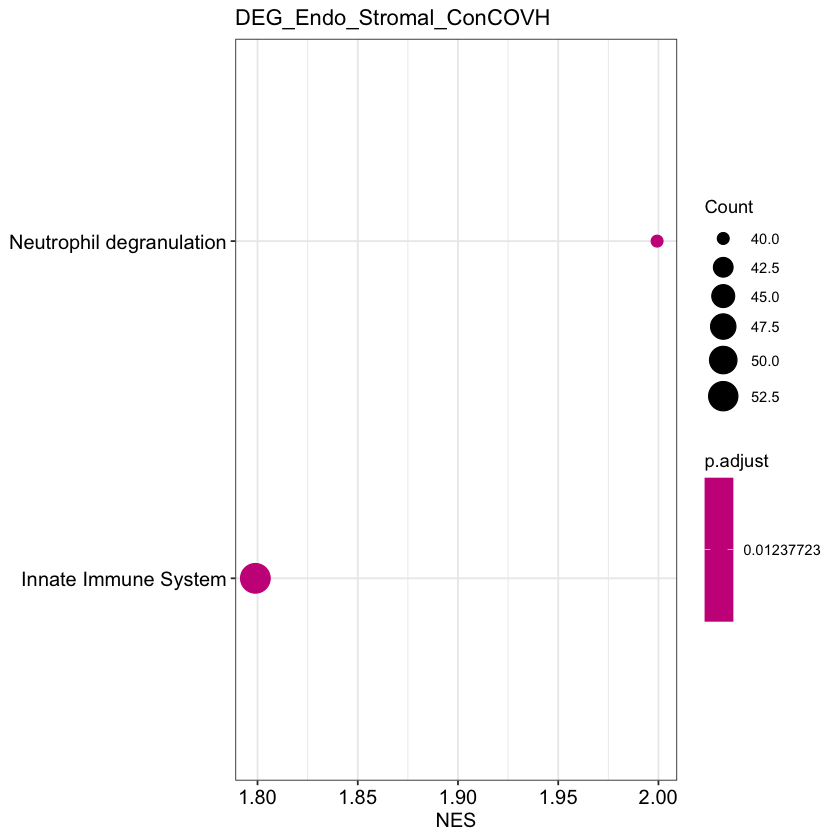

In [11]:
p1 <- dotplot(res[[19]], x = "NES", showCategory = 10) + ggtitle(names(geneList[19]))
p1

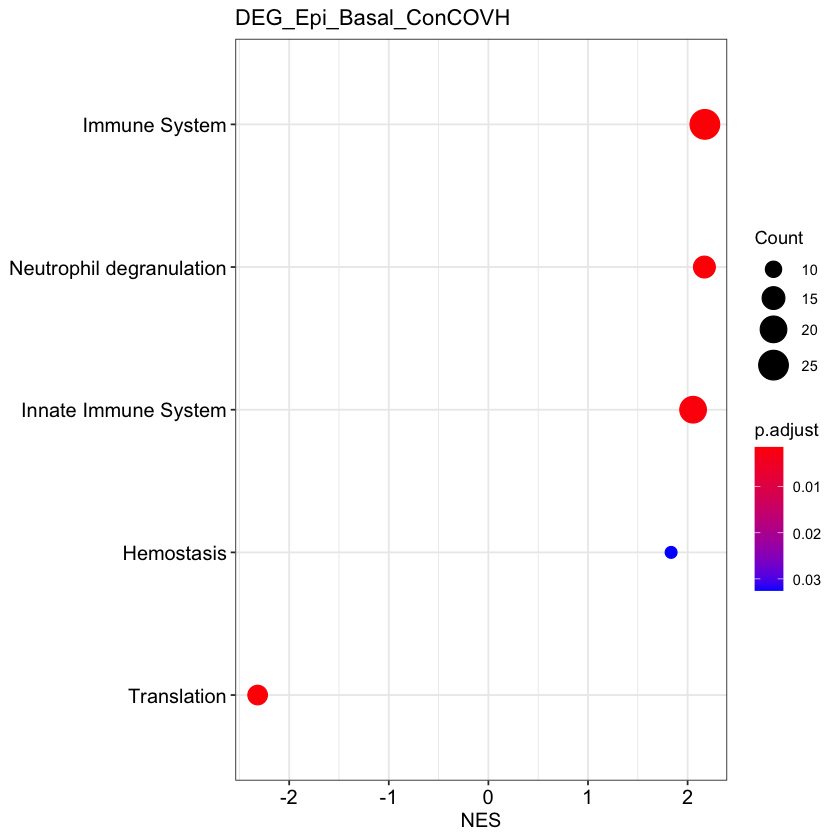

In [12]:
p2 <- dotplot(res[[20]], x = "NES", showCategory = 10) + ggtitle(names(geneList[20]))
p2

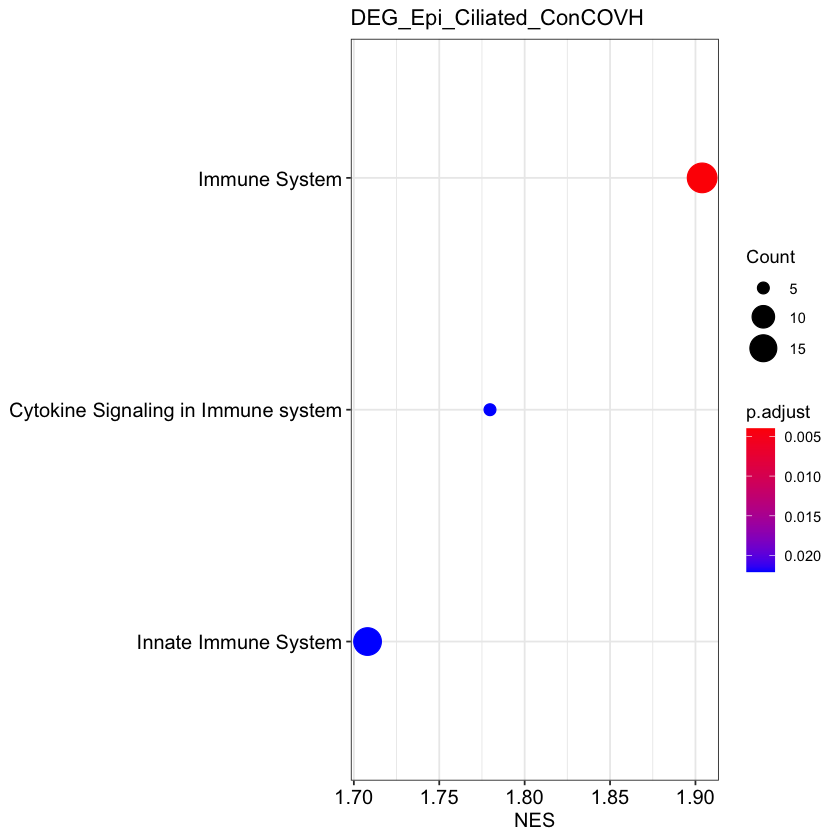

In [13]:
p3 <- dotplot(res[[21]], x = "NES", showCategory = 10) + ggtitle(names(geneList)[21])
p3

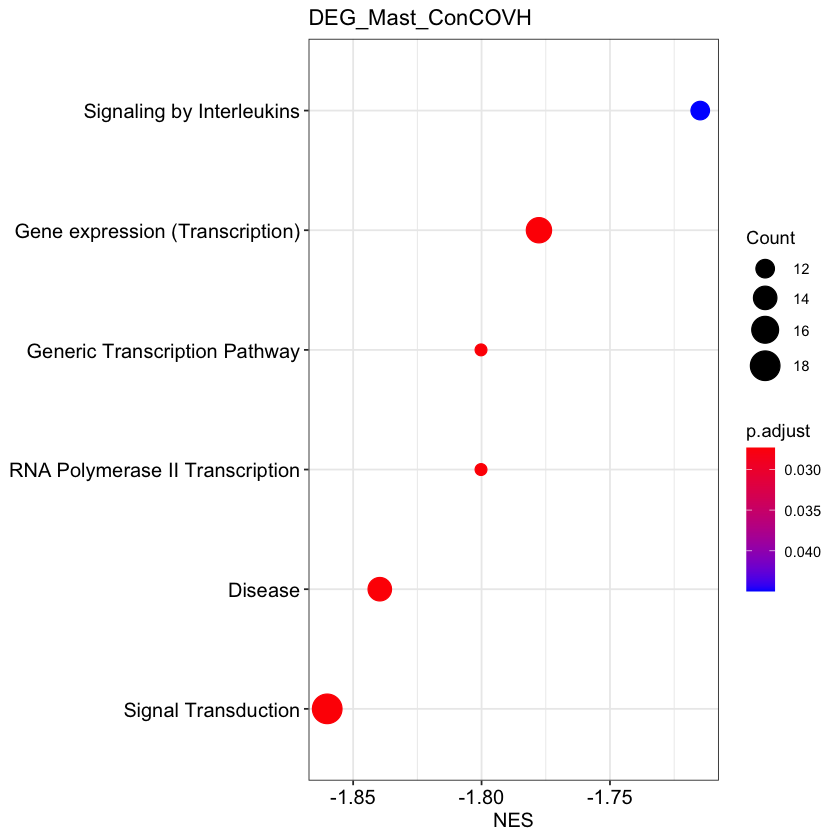

In [14]:
p4 <- dotplot(res[[29]], x = "NES", showCategory = 10) + ggtitle(names(geneList[29]))
p4

In [45]:
pdf("CovvsHealthyDEG_NK_CD16a.pdf")
p3
dev.off()

pdf 
  2